<a href="https://colab.research.google.com/github/ananttater/Chat-with-PDF/blob/main/05.%20Support_Vector_Machine_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Position_Salaries.csv")

In [3]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [9]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
y = y.reshape(-1,1)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [12]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [28]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)
# Radial Basis Function (RBF) kernel
# ref: https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
# predicting new value
print(sc_y.inverse_transform(regressor.predict(sc_x.transform([[6]])).reshape(-1,1)))

[[145503.10688572]]


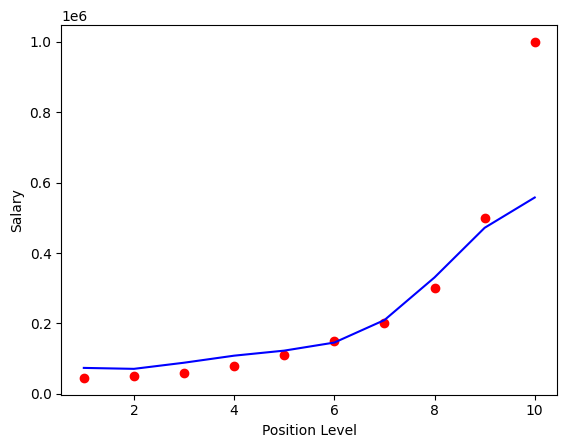

<Figure size 1500x800 with 0 Axes>

In [30]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.figure(figsize=(15,8))
plt.show()

In [35]:
print(round(regressor.score(x,y) * 100, 2),'% - Accuracy')

75.16 % - Accuracy
